Reaction diffusion system simulation: Version using partial differences spatial discretization (1st order) and ode-solver

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

In [134]:
# discretization
size = 1.
x = np.linspace(0,size,101)
dx = x[1] - x[0]
T = 1000.
t = np.linspace(0, T, 101)

In [5]:
# second differential using finite differnces
def diffTwo(Z):
    # first order, maybe try higher order
    Zcenter = Z[1:-1]
    Zleft = Z[:-2]
    Zright = Z[2:]
    return (Zleft - 2*Zcenter + Zright) / dx**2

In [6]:
# function that returns the derivative
def diffusion(u, t, Du):
    dudt = np.zeros_like(u)
    dudt[1:-1] = Du * diffTwo(u)
    # Neumann conditions:
    dudt[0] = 0
    dudt[-1] = 0
    return dudt

In [7]:
def gaussian(x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)
u0 = gaussian(x, 0.5, 0.1)
Du = 0.001

In [8]:
ut = odeint(diffusion, u0, t, (Du,))

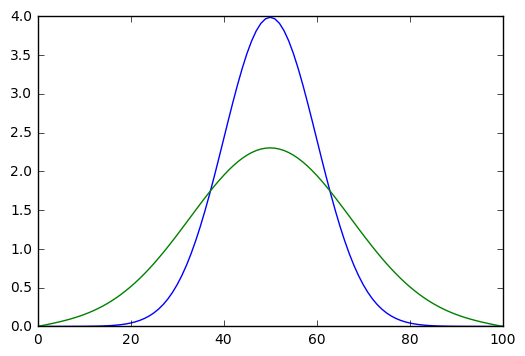

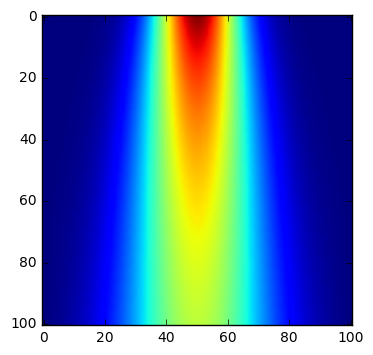

In [9]:
plt.figure(1)
plt.plot(ut[0,:])
plt.plot(ut[-1,:]);

plt.figure(2)
plt.imshow(ut);

Differential equation: 2 component reaction diffusion
$$ \frac{\partial a}{\partial t} = D_a \frac{\partial^2 a}{\partial x^2} - \delta_a a$$
$$ \frac{\partial g}{\partial t} = \frac{\alpha_g \cdot a^n}{K_a^n + a^n} - \delta_g g $$
$$ \boldsymbol{y}(x,t) = \left(\begin{array}{c}a(x,t)\\g(x,t)\end{array}\right) $$
$$ \frac{\partial \boldsymbol{y}}{\partial t} = \boldsymbol{f}(x,t) $$
a is the concentration of AHL, g is GFP

In [73]:
def rd(y, t, Da, delta_a, n, Ka, alpha_g, delta_g):
    varLength = int(len(y)/2)
    a = y[0:varLength-1]
    g = y[varLength:-1]
    ac = a[1:-1]
    gc = g[1:-1]
    dydt = np.zeros_like(y)
    dydt[1:varLength-2] = Da*diffTwo(a) - delta_a*ac
    dydt[varLength+1:-2] = (alpha_g*np.power(ac,n))/(np.power(Ka,n)+np.power(ac,n)) - delta_g*gc
    return dydt

In [145]:
#a0 = np.zeros_like(x)
#a0[0:20] = 1.
a0 = gaussian(x, 0.1, 0.1)
g0 = np.zeros_like(a0)
y0 = np.append(a0,g0)

Da = 0.05
delta_a = 1
n = 5.
Ka = 1.
alpha_g = 10.0
delta_g = 0.01

In [146]:
y = odeint(rd, y0, t, (Da,delta_a,n,Ka,alpha_g,delta_g))
varLength = int(len(y[0,:])/2)
a = y[:,0:varLength-1]
g = y[:,varLength:-1]

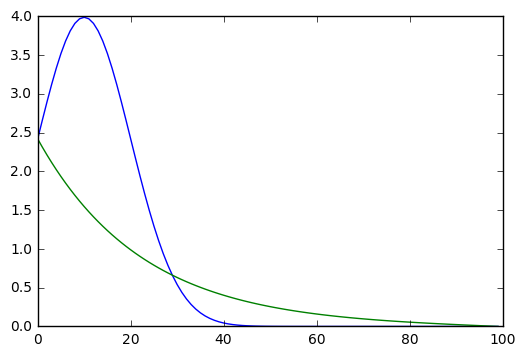

In [147]:
plt.plot(a[0,:])
plt.plot(a[-1,:])

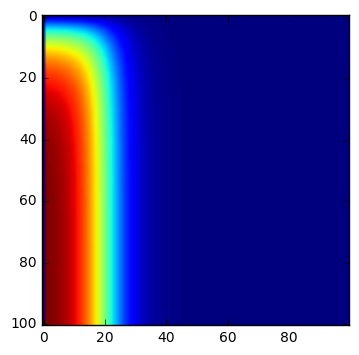

In [150]:
plt.imshow(g)

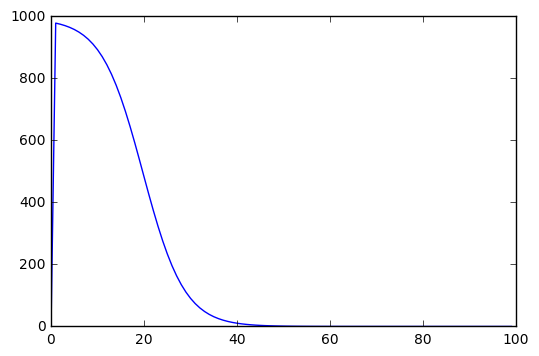

In [149]:
plt.plot(g[50,:])